In [1]:
import starepandas
import geopandas
import pystare
import matplotlib.pyplot as plt
import importlib

In [2]:
fname = '../tests/data/granules/MYD05_L2.A2020060.1635.061.2020061153519.hdf'
modis = starepandas.read_granule(fname, 
                               add_stare=True,
                               adapt_resolution=True,
                               track_first=False)

In [3]:
modis

,lat,lon,stare,Scan_Start_Time,Solar_Zenith,Solar_Azimuth,Sensor_Zenith,Sensor_Azimuth,Water_Vapor_Infrared
0,-4.923621,-33.579193,2833105768974759241,8.571477e+08,3199,-9648,6517,-9903,-9999
1,-4.956750,-33.786446,2833110603003551593,8.571477e+08,3178,-9645,6456,-9901,-9999
2,-4.988602,-33.986107,2833112722354712041,8.571477e+08,3158,-9642,6395,-9899,5392
3,-5.019270,-34.178722,2833084363820531337,8.571477e+08,3139,-9639,6335,-9897,5532
4,-5.048833,-34.364750,2833230005031123593,8.571477e+08,3120,-9636,6275,-9895,5304
...,...,...,...,...,...,...,...,...,...
109615,10.103586,-57.200943,2499696282523506889,8.571480e+08,2017,-15104,6222,8010,-9999
109616,10.071841,-57.382591,2499763921241658537,8.571480e+08,2006,-15145,6281,8006,-9999
109617,10.038896,-57.570473,2499750202427574985,8.571480e+08,1994,-15189,6341,8003,2273
109618,10.004664,-57.765011,2499745802665205321,8.571480e+08,1982,-15235,6401,7999,2564


In [5]:
trixels = modis.trixels()
modis.set_trixels(trixels, inplace=True)

In [6]:
geom = geopandas.points_from_xy(modis.lon, modis.lat)
modis.set_geometry(geom, inplace=True)

In [ ]:
fig, ax = plt.subplots(figsize=(3,3), dpi=200)
ax.grid(True)

ax.set_xlim(-60,-55)
ax.set_ylim(5,12)
modis.plot(trixels=False, ax=ax)
modis.plot(trixels=True, color='r', ax=ax)

# Manually getting the 2D STARE array

In [8]:
import netCDF4
from pyhdf.SD import SD
import numpy
import pystare
import datetime

In [9]:
hdf = SD(fname)
lon = hdf.select('Longitude').get().astype(numpy.double)
lat = hdf.select('Latitude').get().astype(numpy.double)

In [10]:
start = datetime.datetime.now()
sids = pystare.from_latlon2D(lat=lat, lon=lon, adapt_resolution=True)
datetime.datetime.now()-start

datetime.timedelta(0, 1, 9116)

In [11]:
print(pystare.spatial_resolution(sids).min())
print(pystare.spatial_resolution(sids).max())

9
11


# Intersecting Data 

In [12]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.sort_values(by='name', inplace=True)
stare = starepandas.stare_from_gdf(world, level=7, force_ccw=True)
world = starepandas.STAREDataFrame(world, stare=stare)
trixels = world.trixels()
world.set_trixels(trixels, inplace=True)

<AxesSubplot:>

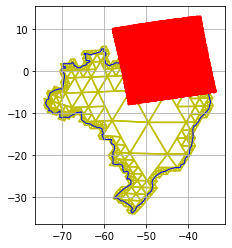

In [13]:
fig, ax = plt.subplots()
ax.grid(True)

brazil = world[world.name=='Brazil']
brazil.plot(ax=ax, trixels=True, boundary=True, color='y', zorder=0)
brazil.plot(ax=ax, trixels=False, facecolor="none", edgecolor='blue', zorder=1)
modis.plot(ax=ax, color='red', trixels=True)

In [15]:
a = modis.stare_intersects(brazil['stare'].iloc[0])
a.any()

True

In [17]:
len(brazil['stare'].iloc[0])

565